## Keras 기본 지식

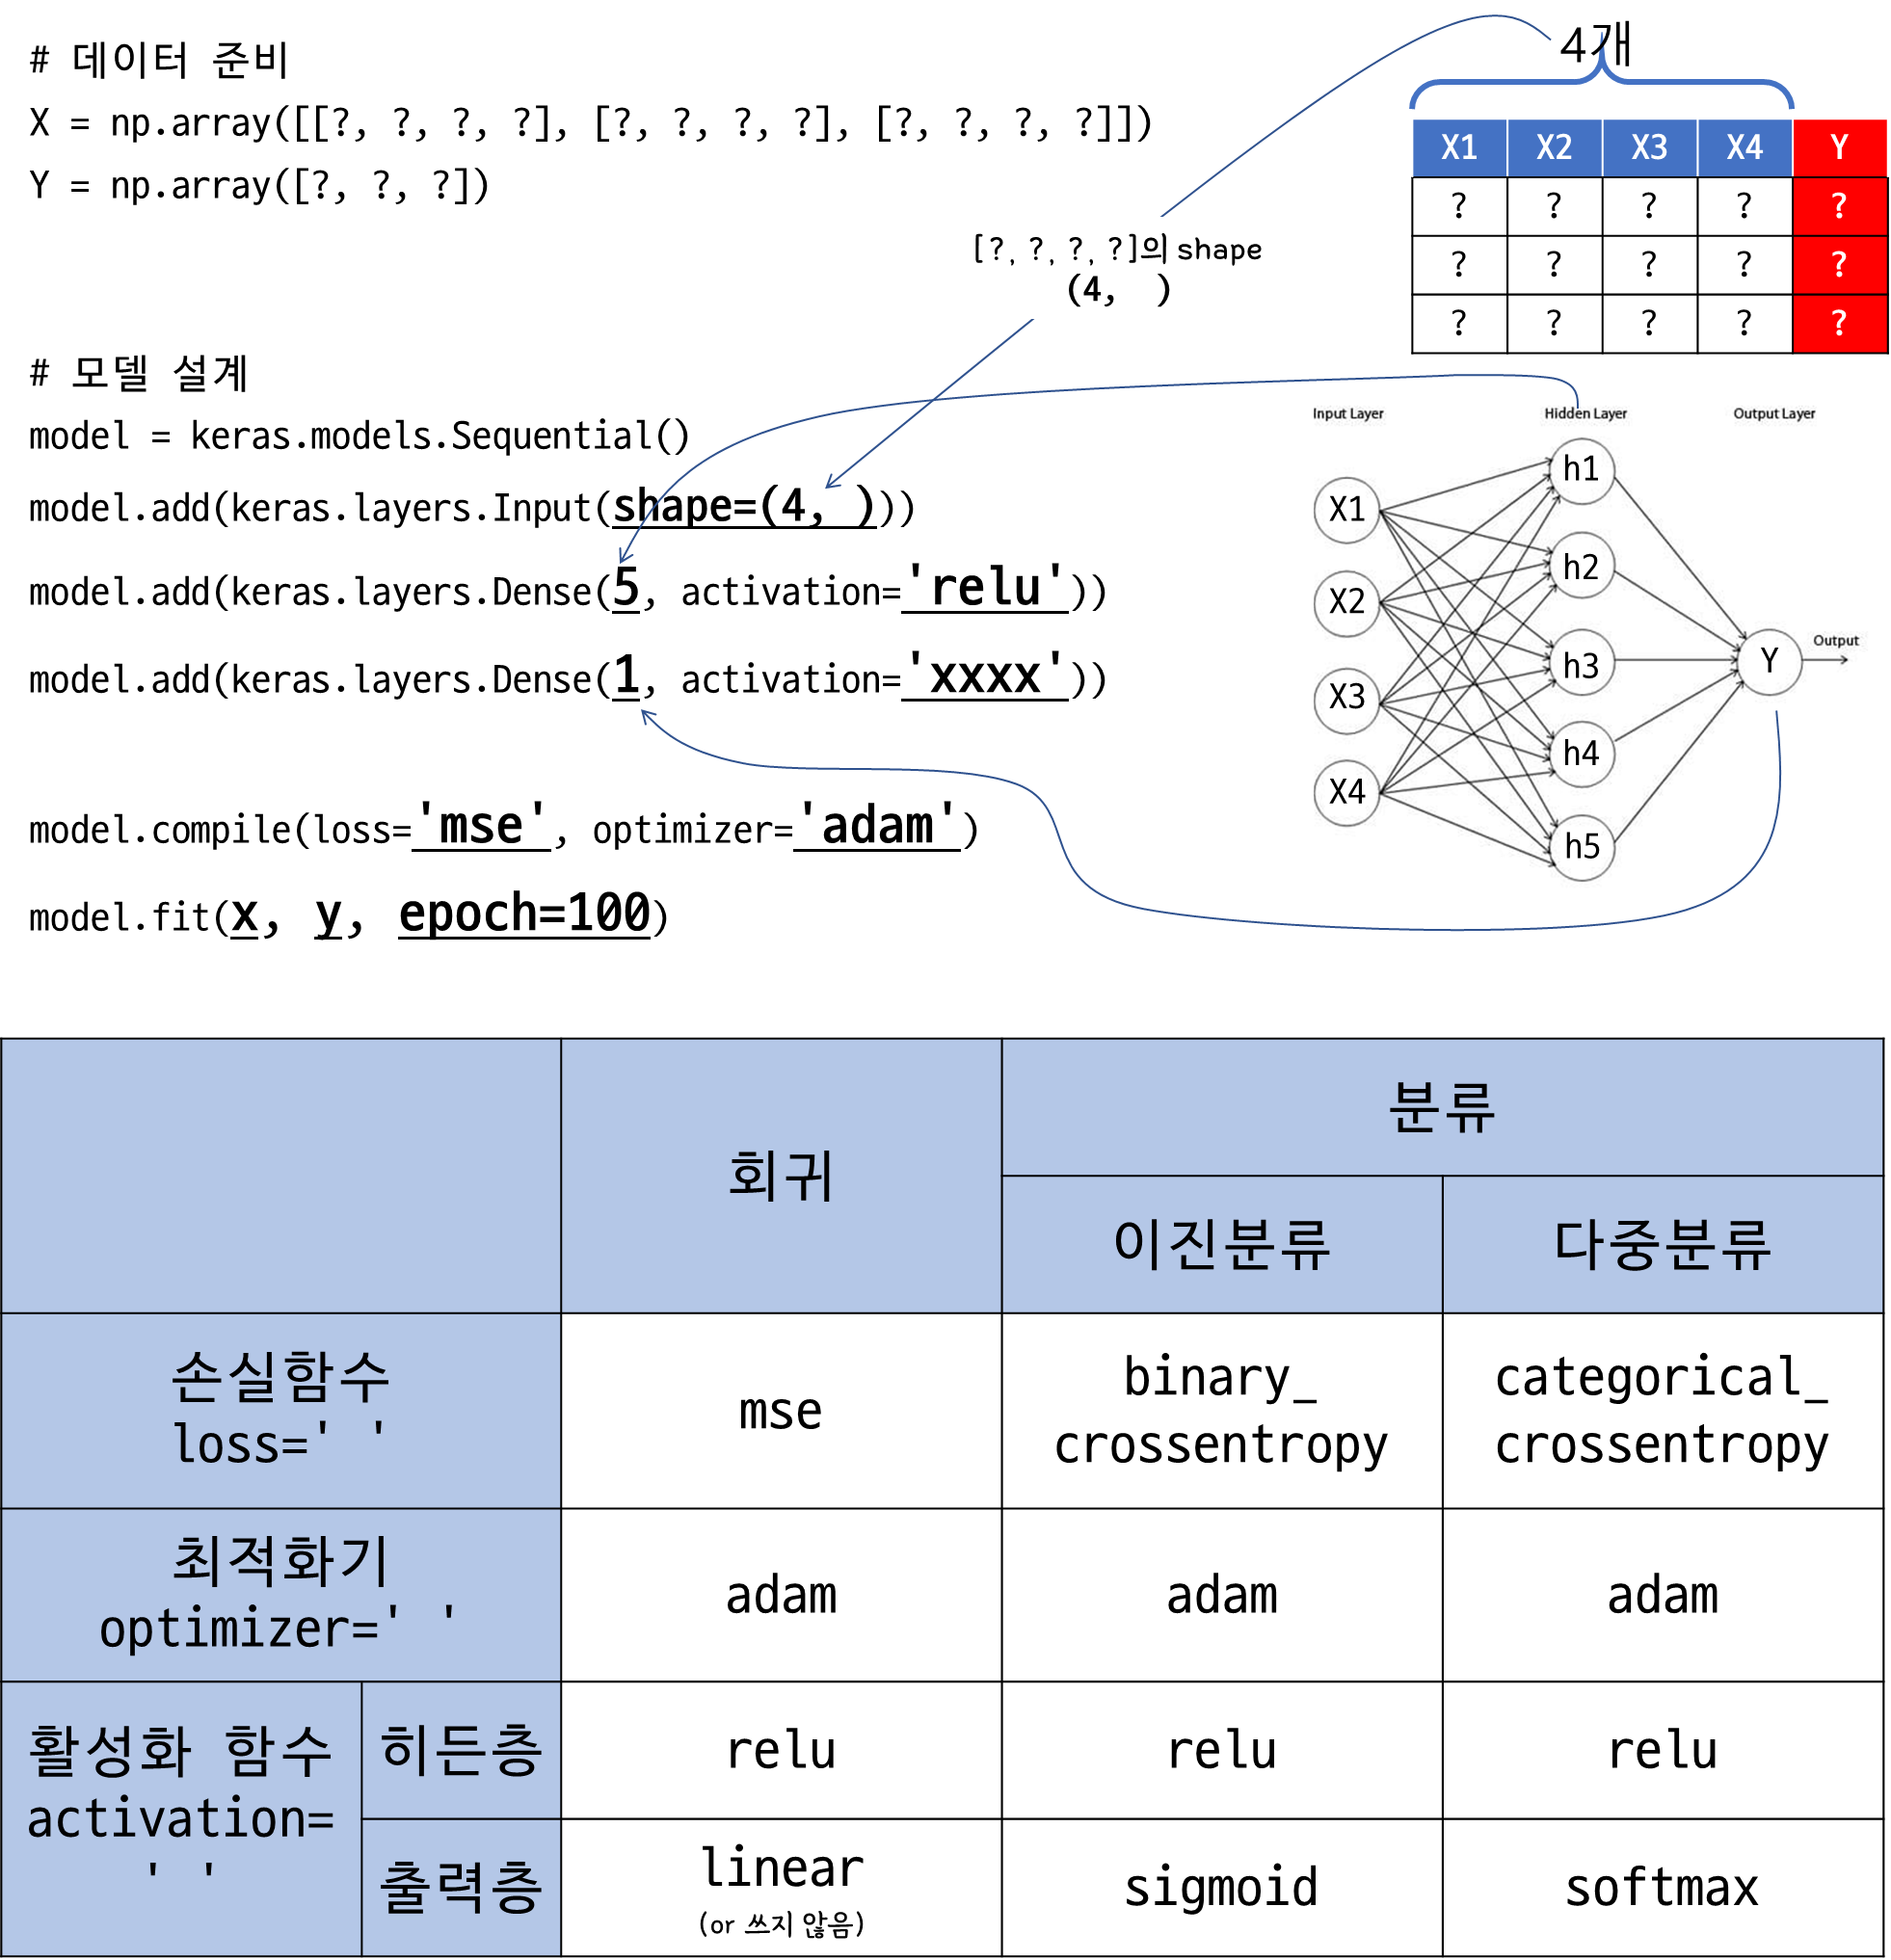

## 성적 예측 모델을 keras로 작성해 보기

In [ ]:
import numpy as np

x = np.array([ 2,  4,  6,  8])   # 공부시간 : 독립변수
y = np.array([81, 93, 91, 97])   # 시험점수 : 종속변수

w, b = 0, 0

n = 4
lr = 0.03    # 학습률

for i in range(1, 10) :
    y_pred = a * x + b
    error = y_pred - y
    MSE = np.mean(error ** 2)

    print(f"{i}번째 Epoch, {a:.2f}x+{b:.2f}, 오차 제곱의 합{MSE:.2f}")

    a_grad = (2/n) * np.sum(error * x)
    b_grad = (2/n) * np.sum(error)

    a = a - lr * a_grad
    b = b - lr * b_grad

In [ ]:
# 단순선형 회귀
import keras
import numpy as np

# 1. 데이터 준비
x = np.array([[2], [4], [6], [8]])
y = np.array([81, 93, 91, 97])

# 2. 모델의 구조 설계
model = keras.Sequential()
model.add(keras.layers.Input(shape=(1,)))
model.add(keras.layers.Dense(1, activation='linear'))

# 3. 모델 학습 설정
# my_opt = keras.optimizers.Adam(learning_rate=0.5)  # Adam 옵티마이저 생성, 학습률 지정
model.compile(loss='mse', optimizer='adam')

# 모델 학습 시작
model.fit(x, y, epochs=500)

In [ ]:
# 다중 선형회귀
import keras
import numpy as np

# 1. 데이터 준비
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

# 2. 모델의 구조 설계
model = keras.Sequential()
model.add(keras.layers.Input(shape=(2,)))
model.add(keras.layers.Dense(1, activation='linear'))

# 3. 모델 학습 설정
my_opt = keras.optimizers.Adam(learning_rate=0.5)  # Adam 옵티마이저 생성, 학습률 지정
model.compile(loss='mse', optimizer=my_opt)

# 모델 학습 시작
model.fit(x, y, epochs=500)

In [ ]:
# 모델의 구조 보기



In [ ]:
# 모델이 학습한 파라미터 확인하기



## 회귀모델 : 보스턴(BOSTON)의 집값을 예측하는 모델 개발

데이터 URL : https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv

- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 본인 소유의 주택 가격(중앙값) - 종속변수 (위의 건 독립변수)

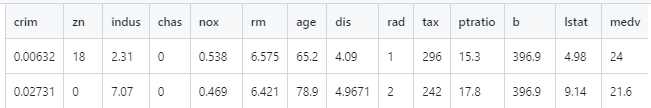

### Pandas 라이브러리로 보스턴 집값 데이터셋 살펴보기

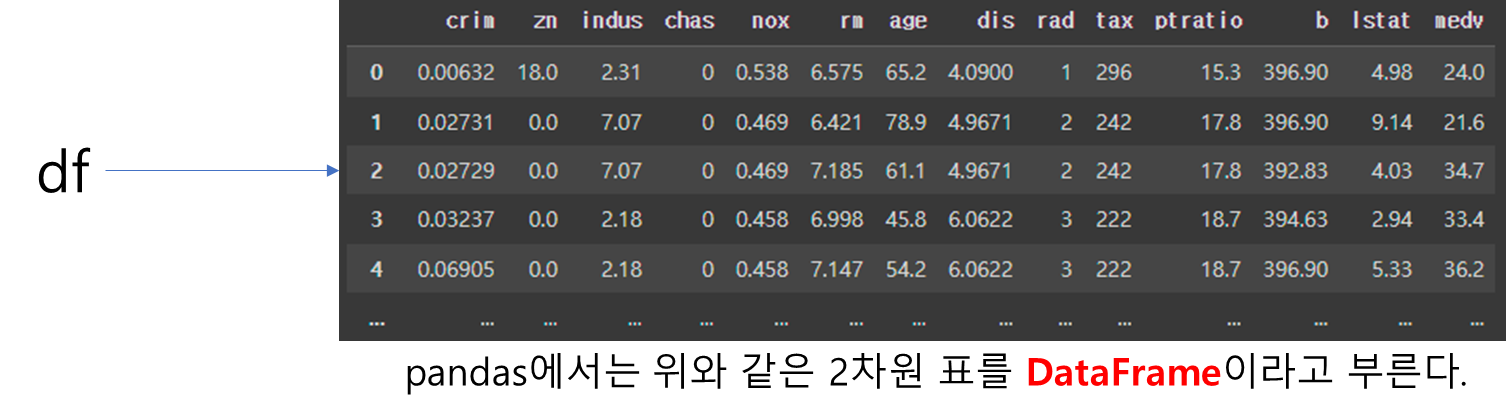

In [17]:
import pandas as pd

# 아래 URL의 CSV 데이터 파일 판다스로 불러오기(읽어오기)
# https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv
df = pd.read_csv(  )

In [ ]:
# df 데이터 프레임 보기



In [ ]:
# 문제 : df 데이터 프레임 첫 5개만 보기



In [ ]:
# 문제 : df 데이터 프레임 마지막 5개만 보기



In [ ]:
# 문제 : df 데이터 프레임의 행의 갯수와 열의 개수 보기



In [ ]:
# 문제 : df 데이터 프레임의 컬럼명, 컬럼별 데이터 수, 데이터 타입을 확인



In [ ]:
# 문제 : 컬럼별 샘플 수, 평균, 표준편차, 최소값 등의 통계데이터 보기



In [ ]:
# 문제 : 모든 컬럼명 보기



In [42]:
# 문제 : crim(범죄율) 컬럼만 자르기


,age,zn
0,65.2,18.0
1,78.9,0.0
2,61.1,0.0
3,45.8,0.0
4,54.2,0.0
...,...,...
501,69.1,0.0
502,76.7,0.0
503,91.0,0.0
504,89.3,0.0


In [ ]:
# 문제 : age(1940년 이전에 건축된 소유 주택의 비율), rm(방개수) 컬럼만 자르기



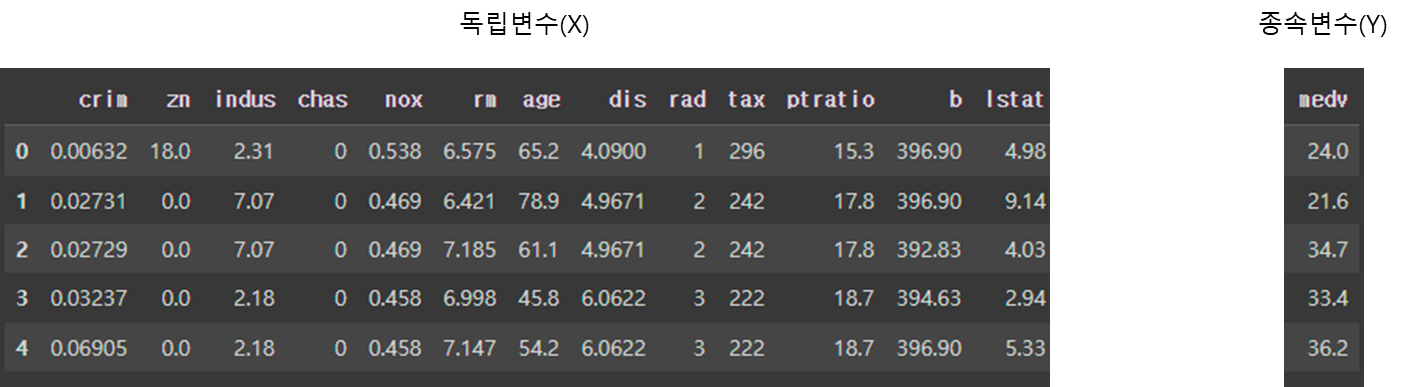

In [33]:
# 모든 컬럼명(feature) 추출

df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# 독립변수 컬럼 데이터만 x에

x = df[????]
x

In [ ]:
# 종속변수 컬럼 데이터만 y에

y = df[???]
y

#### 싱글-레이어 퍼셉트론 모델(SLP : Single-Layer Perceptron)

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras

# 1. 데이터를 준비한다.
df = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv")

x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['medv']


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(13, )))
model.add(keras.layers.Dense(1))


# 3. 모델의 학습을 설정한다.
# my_opt = keras.optimizers.SGD(learning_rate=0.000001)
model.compile(loss='mse', optimizer='adam')


# 4. 모델을 학습시킨다.
model.fit(x, y, epochs=100)

In [ ]:
# 모델의 구조 및 학습 파라미터 개수 보기
model.summary()

In [ ]:
# 모델의 가중치 확인하기
model.get_weights()

In [ ]:
# 집값 예측해 보기(0:5)

model.predict(x[0:5])

In [ ]:
# 정답 확인해 보기(0:5)

y[0:5]

#### 멀티-레이어 퍼셉트론 모델(MLP : Multi-Layer Perceptron)

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras

# 1. 데이터를 준비한다.
df = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv")

x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['medv']


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(13, )))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))


# 3. 모델의 학습을 설정한다.
# my_opt = keras.optimizers.SGD(learning_rate=0.000001)
model.compile(loss='mse', optimizer='adam')


# 4. 모델을 학습시킨다.
model.fit(x, y, epochs=100)

## 이진분류 : 와인 종류 예측(화이트와인 or 레드와인

In [ ]:
# 1. 데이터를 준비한다.
df = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/wine_header.csv")
df

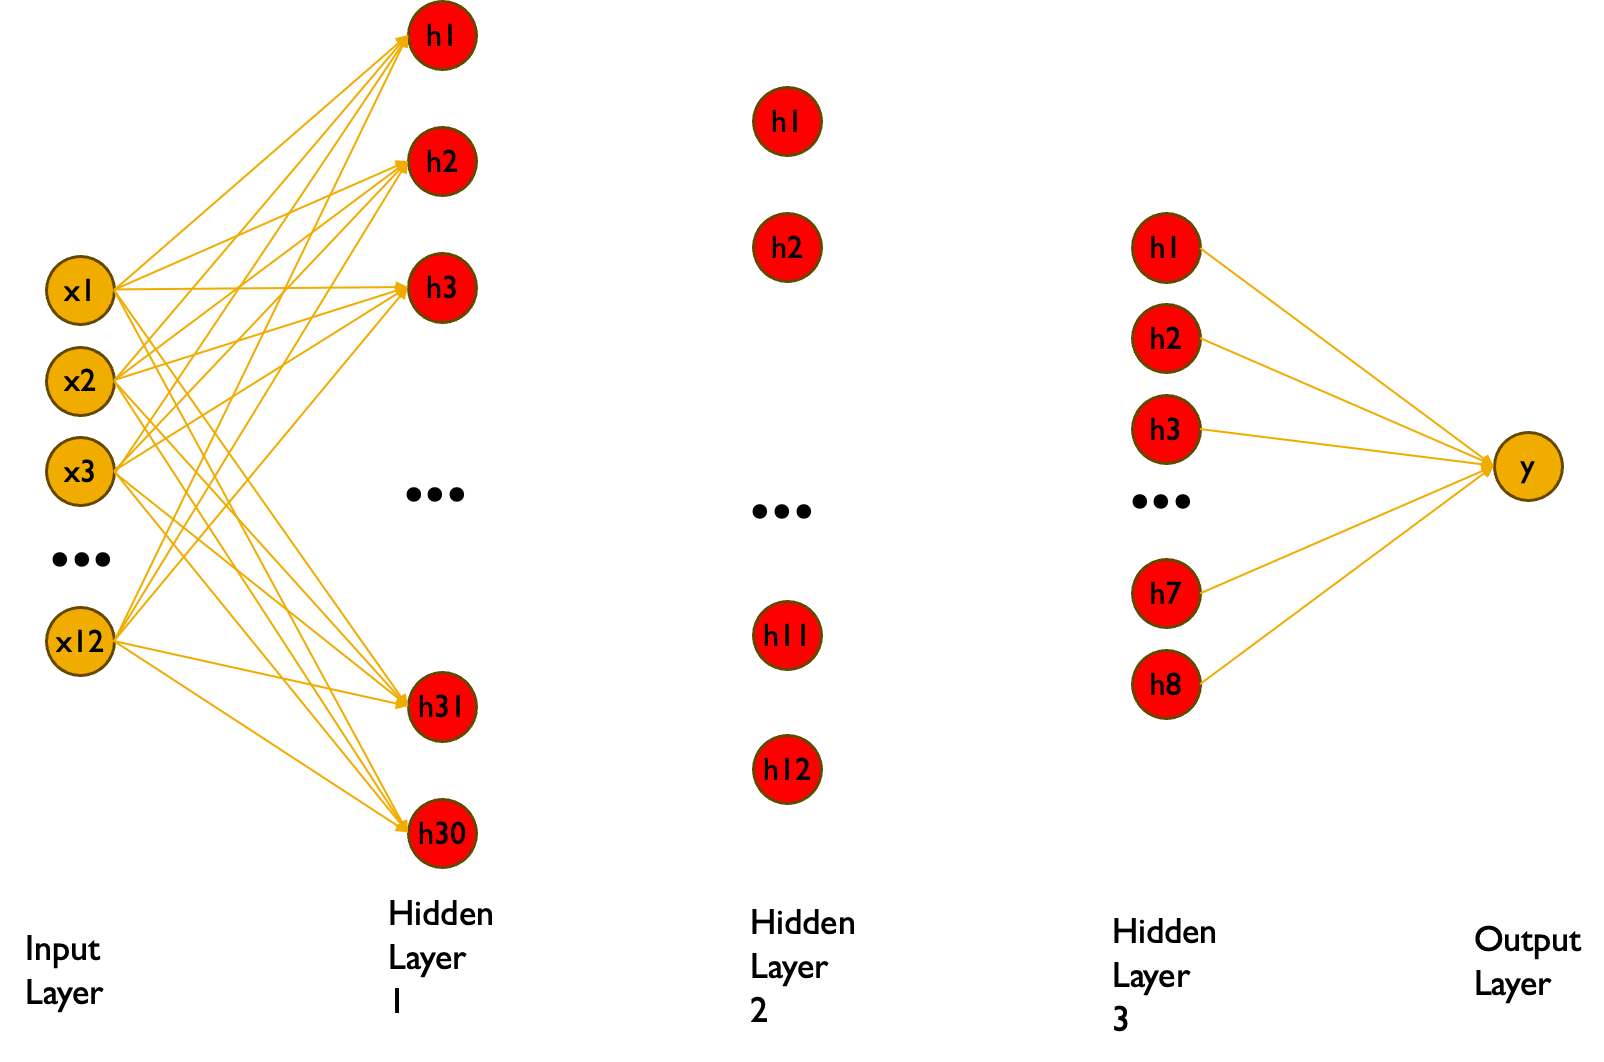

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras


# 1. 데이터를 준비한다.
wine = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/wine_header.csv")

x = wine[['주석산_농도', '아세트산_농도', '구연산_농도', '잔류당분_농도', '염화나트륨_농도', '유리아황산_농도', '총_아황산_농도', '밀도', 'pH', '황산칼륨_농도', '알코올_도수', '와인맛_등급']]
y = wine['종류(0W1R)']


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(12, )))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


# 3. 모델의 학습을 설정한다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # metrics: 모델의 평가 지표 설정(정확도, accuracy)


# 4. 모델을 학습시킨다.
# 전체 데이터로 학습시키기
hist = model.fit(x, y, epochs=100, validation_split=0.2)

#### 학습 진행과정 시각화 하기

In [ ]:
# 학습이력 보기

hist.history

history 객체는 다음과 같은 키(key)를 가지고 있습니다.

```
loss: 훈련 데이터에 대한 손실값         : hist.history['loss']
val_loss: 검증 데이터에 대한 손실값     : hist.history['val_loss']
accuracy: 훈련 데이터에 대한 정확도     : hist.history['accuracy']
val_accuracy: 검증 데이터에 대한 정확도 : hist.history['val_accuracy']
```



In [ ]:
# train_data의 오차와 정확도
hist.history['loss']
hist.history['accuracy']

# validation_data의 오차와 정확도
hist.history['val_loss']
hist.history['val_accuracy']

In [ ]:
import matplotlib.pyplot as plt

# 훈련 손실 그래프
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

# 훈련 정확도 그래프
plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right') # 범례
plt.tight_layout()

plt.show()

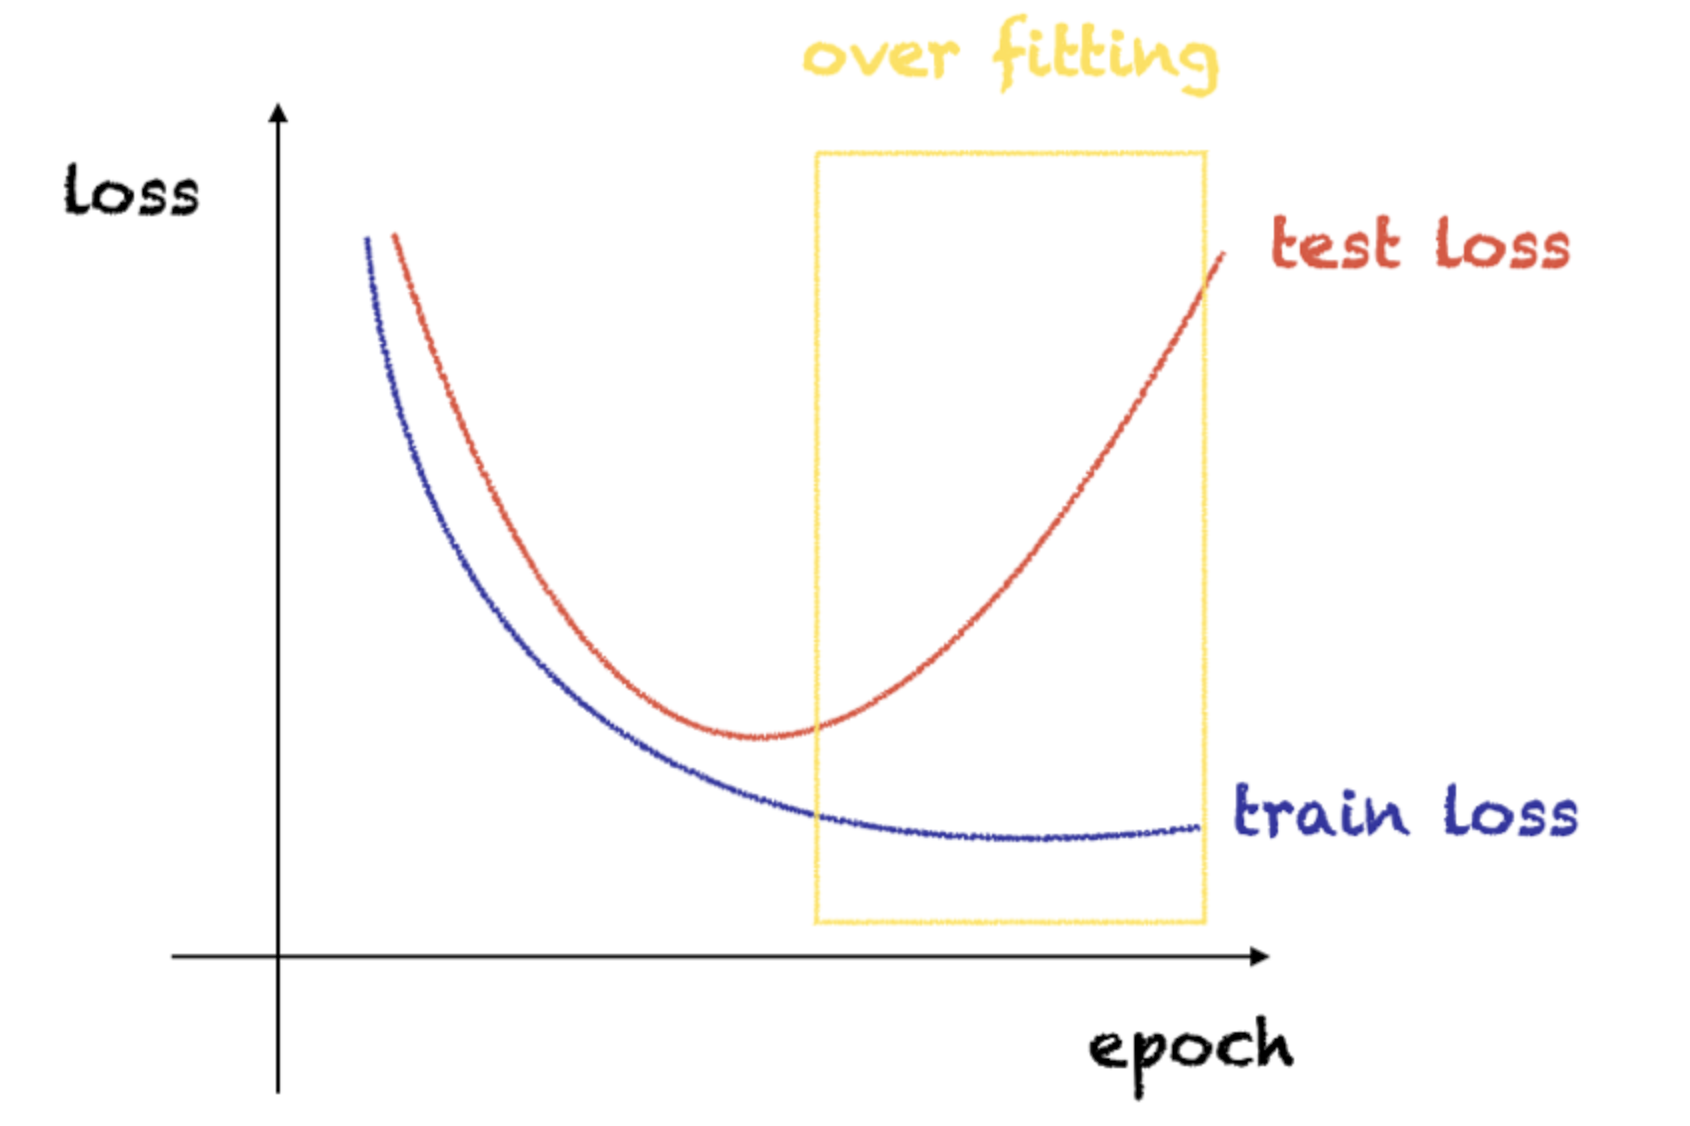

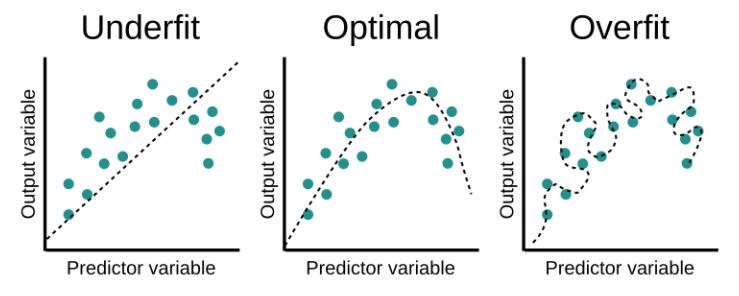

## 다중분류 : 붓꽃 품종 분류(setosa, versicolor, virginica)

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split


# 1. 데이터를 준비한다.
iris = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/iris.csv")
iris

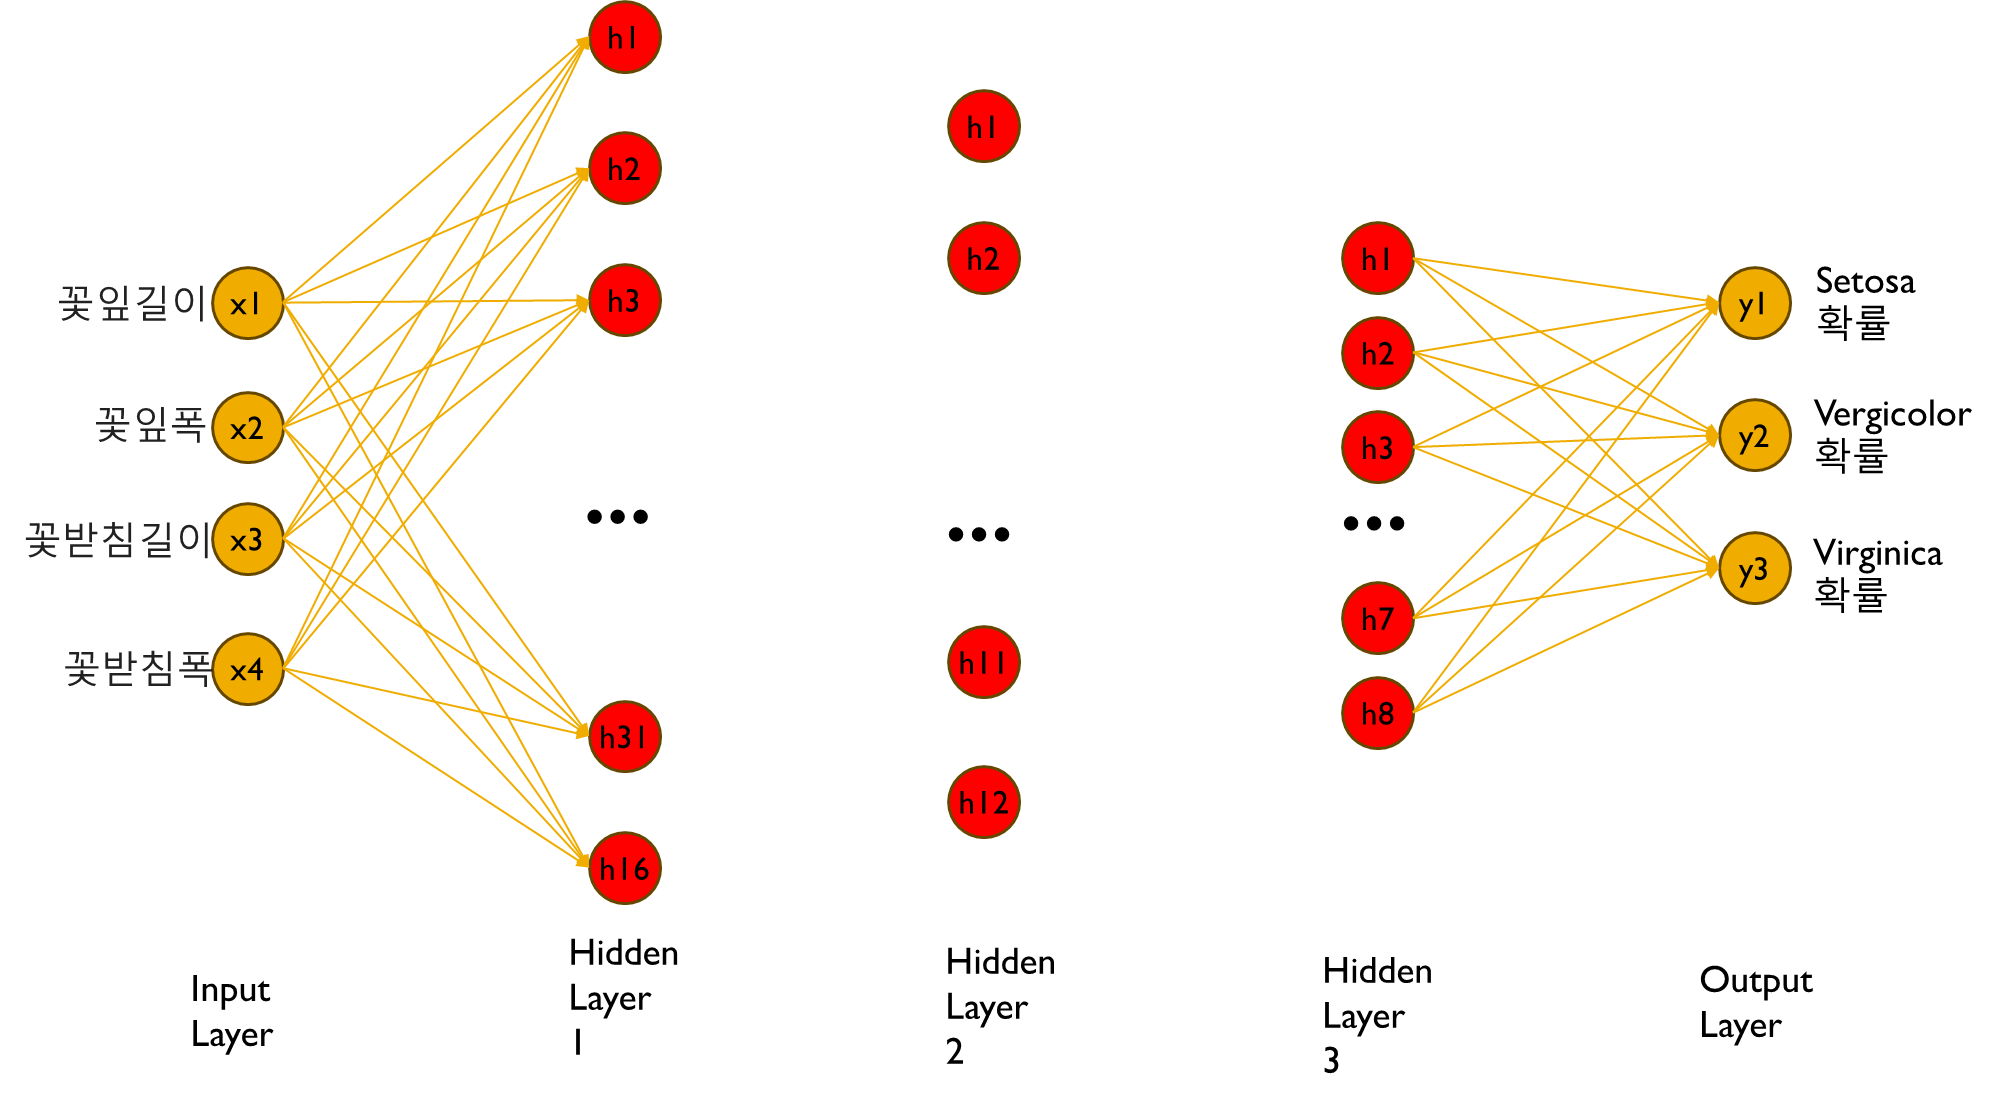

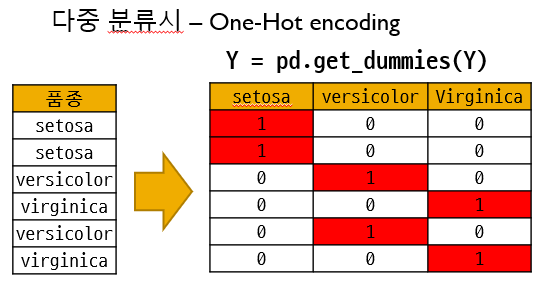

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split


# 1. 데이터를 준비한다.
iris = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/iris.csv")

# 1-1. 독립변수와 종속변수로 분리
x = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
y = iris['품종']

# 1-2. 종속변수에 대해 one-hot 인코딩(다중 분류) #################################################################
y = pd.get_dummies(y)

# 1-3. 훈련용(train) 데이터와 평가용(test) 데이터를 80% : 20 %로 분리 ############################################
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(4, )))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(train_x, train_y, epochs=100, validation_split=0.2)